In [1]:
'''
Makes plots from a CSV downloaded from the Iridium Web Console (IWC) Reports.

'''
import argparse
import pandas as pd
from datetime import datetime as dtdt
from utils import *

def main(csv_path, save_path, title):
    '''
    Main function to get data from CSV and call plotting code.
    '''
    # open csv
    all_data = pd.read_csv(csv_path)

    # create directory to save pictures in if it doesn't already exist
    if save_path:
        os.makedirs(save_path, exist_ok=True)

    try:
        time = all_data['Date']
        sat_used = all_data['Satellites Used']
        sat_view = all_data['Satellites In View']
        mass1 = all_data['Boom 1']
        mass2 = all_data['Boom 2']
        mass3 = all_data['Boom 3']
        volt_in = all_data['Input Volts']
        volt_supply = all_data['Supply Volts']
        current_main = all_data['Main Current']
        current_ant = all_data['Antenna Current']
        temp = all_data['System Temperature']
        time_error = all_data['Time Error']
        vco_best = all_data['VCO Best']
        vco_init = all_data['VCO Initial']
        vco_rms = all_data['VCO RMS']
        boots = all_data['Total Boots']
        resyncs = all_data['Total Resyncs']
        latitude = all_data['Latitude']
        longitude = all_data['Longitude']
    except KeyError as e:
        raise Exception(f'The column {e} was not found in the input CSV.')

    #TODO break up into lat/long positions

    # satellite graph
    sat_dict = create_dict([sat_used, sat_view],
                            ['Satellites Used', 'Satellites in View'],
                            ['r', 'b'],
                            'Number of Satellites')
    plot_same_axis(time, title, sat_dict)
    if save_path:
        save_fig(save_path, 'satellites.png')

        
    # mass positions graph
    mass_dict = create_dict([mass1/10, mass2/10, mass3/10],
                            ['Mass 1', 'Mass 2', 'Mass 3'],
                            ['r', 'g', 'b'],
                            'Mass Position (V)')
    plot_same_axis(time, title, mass_dict)
    if save_path:
        save_fig(save_path, 'mass_positions.png')

    
    # power graph
    volt_dict = create_dict([volt_in, volt_supply],
                            ['Input Voltage', 'Supply Voltage'],
                            ['orangered', 'orange'],
                            'Voltage (V)')
    current_dict = create_dict([current_main, current_ant],
                            ['Main Current', 'Antenna Current'],
                            ['royalblue', 'darkturquoise'],
                            'Current (mA)')
    plot_n_subplots(time, title, y1_dict=volt_dict, y2_dict=current_dict)
    if save_path:
        save_fig(save_path, 'power.png')

    # boot graph
    boots_dict = create_dict([boots], ['Total Boots'], ['r'], 'Total Boots')
    resyncs_dict = create_dict([resyncs], ['Total Resyncs'], ['b'], 'Total Resyncs')
    plot_n_subplots(time, title, y1_dict=boots_dict, y2_dict=resyncs_dict)
    if save_path:
        save_fig(save_path, 'boots_resyncs.png')

    # time error and VCO graph
    temp_dict = create_dict([temp], ['Temperature'], ['r'], 'Temperature\n(C)')
    error_dict = create_dict([time_error*(1e6)], ['Time Error'], ['g'], 'Time Error\n(us)')
    vco_dict = create_dict([vco_best, vco_init, vco_rms],
                            ['VCO Best', 'VCO Initial', 'VCO RMS'],
                            ['deepskyblue', 'royalblue', 'darkblue'],
                            'VCO')

    plot_n_subplots(time, title, y1_dict=temp_dict, y2_dict=error_dict, y3_dict=vco_dict)
    if save_path:
        save_fig(save_path, 'time_error.png')

    # messages graph
    temp_dict = create_dict([temp], ['Temperature'], ['r'], 'Temperature\n(C)')
    volt_dict = create_dict([volt_in],
                            ['Input Voltage'],
                            ['g'],
                            'Voltage\n(V)')
    current_dict = create_dict([current_main],
                            ['Main Current'],
                            ['b'],
                            'Current\n(mA)')

    dates = pd.DataFrame([dtdt.strptime(i, '%Y-%m-%d %H:%M:%S').date() for i in all_data['Date']])

    messages = []
    for date, group in dates.groupby(0):
        for i in range(len(group)):
            messages.append(len(group))

    mess_dict = create_dict([messages],
                            ['Messages'],
                            ['purple'],
                            'Messages\nPer Day')
    plot_n_subplots(time, title, y1_dict=temp_dict, y2_dict=volt_dict, y3_dict=current_dict, y4_dict=mess_dict)

    if save_path:
        save_fig(save_path, 'messages.png')
        

    
    # show figures if they aren't saved
    if save_path == None:
        plt.show()




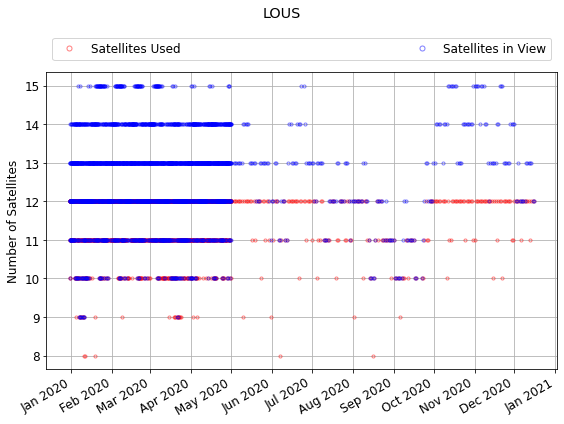

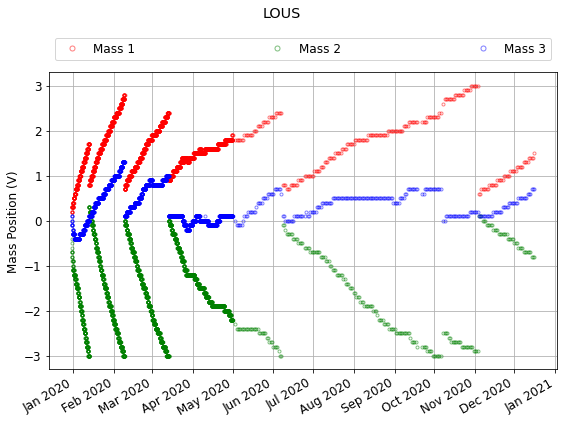

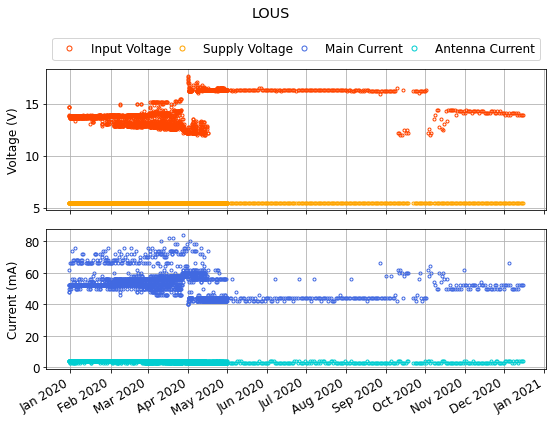

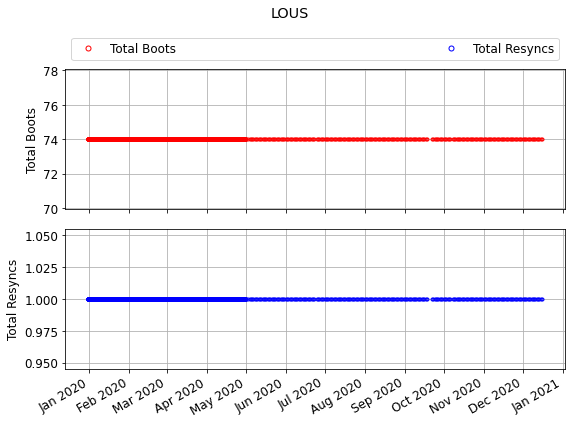

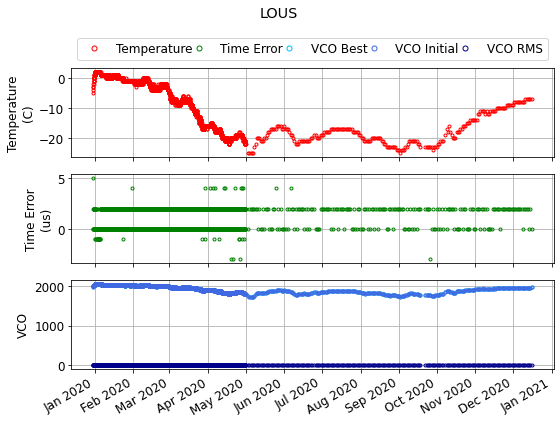

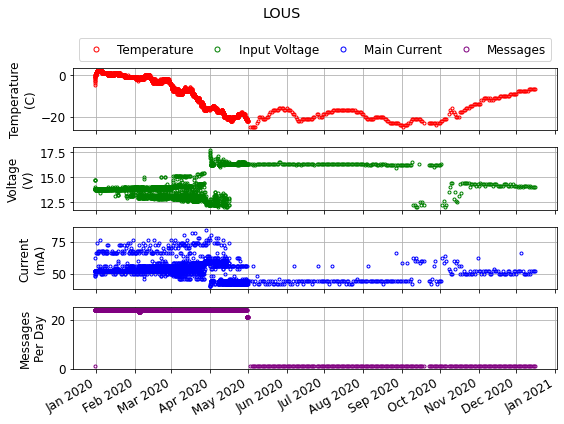

In [4]:
## USER INPUTS HERE:

# path to CSV downloaded from IWC
station = "LOUS"
csv_path = f"/home/mad/Documents/TIME_batteries/SOH_Graphs/station_data/{station}/{station}.csv"

# path to save figures. Set to "None" if you don't want to save them.
save_path = f"//home/mad/Documents/TIME_batteries/SOH_Graphs/station_data/{station}/"


# title to add to all figures. Set to "None" if you don't want a title.
title = f"{station}"



# call main()
main(csv_path, save_path, title)
